In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tushare as ts

%matplotlib inline


In [81]:
ts.set_token('ec224ad0c0b275425ed862c6b7a4978a4ff6d3e9bcf10c7ec9c5808e')
pro=ts.pro_api()


In [82]:
tcl=pro.daily(ts_code='000100.SZ',start_date='20180101',end_date='20190910')
zx=pro.daily(ts_code='600030.SH',start_date='20180101',end_date='20190910')
mj=pro.daily(ts_code='000723.SZ',start_date='20180101',end_date='20190910')

In [83]:
#将所有股票数据放到一个列表，方便concat
stock=[tcl,zx,mj]

#定义函数计算收益率
def rate(df):
    df['rate']=df['close']/df['close'].shift(1)-1
    
#定义一个设置index为日期的函数，其实可以更加简单，直接index等于就好
def set_indexs(df):
    df['trade_date']=pd.to_datetime(df['trade_date'])
    df=df.set_index(['trade_date'],inplace=True)

#运行函数，并且设置日期升序
for df in stock:
    set_indexs(df=df)
    df.sort_index(ascending=True,inplace=True)
    rate(df=df)


In [84]:
df=pd.concat(stock,axis=1,keys=['tcl','zx','mj'])

In [85]:
#利用reindex选出列
test=df.reindex(columns=['rate'],level=1)


In [86]:
#计算时间测试
from datetime import datetime
time=datetime(2019,9,10)-datetime(2018,1,1)
sum_rate=test.mean()*617

In [87]:
prets=[]
pvols=[]
for i in range(2500):
    weights=np.random.random(3)
    weights/=np.sum(weights)
    prets.append(np.sum(test.mean()*weights)*617)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(test.cov()*617,weights))))
prets=np.array(prets)
pvols=np.array(pvols)

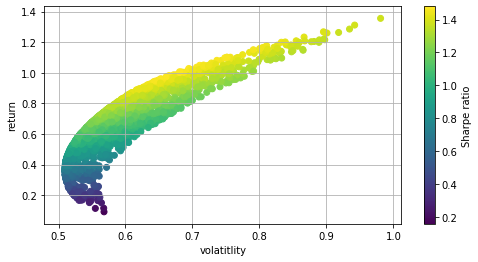

In [88]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets,c=prets/pvols,marker='o')
plt.grid(True)
plt.xlabel('volatitlity')
plt.ylabel('return')
plt.colorbar(label='Sharpe ratio')


In [89]:
df.head()

tcl                                                   \
              ts_code  open  high   low close pre_close change pct_chg   
trade_date                                                               
2018-01-02  000100.SZ  3.88  3.94  3.88  3.91      3.90   0.01    0.26   
2018-01-03  000100.SZ  3.90  4.01  3.89  3.99      3.91   0.08    2.05   
2018-01-04  000100.SZ  3.98  4.03  3.95  3.96      3.99  -0.03   -0.75   
2018-01-05  000100.SZ  3.97  3.97  3.90  3.92      3.96  -0.04   -1.01   
2018-01-08  000100.SZ  3.92  3.93  3.84  3.88      3.92  -0.04   -1.02   

                                    ...    mj                              \
                   vol      amount  ...  open  high   low close pre_close   
trade_date                          ...                                     
2018-01-02   891914.47  348298.561  ...  6.90  6.93  6.88  6.88      6.89   
2018-01-03  1460967.32  578296.762  ...  6.88  6.91  6.80  6.82      6.88   
2018-01-04   931098.87  370750.903  ...  6.81  6.82  6.68  6.74      6.82   
2018-01-05   895278.01  351262.479  ...  6.74  6.78  6.69  6.73      6.74   
2018-01-08  1195519.87  463110.265  ...  6.75  6.93  6.72  6.85      6.73   

                                                            
           change pct_chg        vol      amount      rate  
trade_date                                                  
2018-01-02  -0.01   -0.15   92930.60   64106.772       NaN  
2018-01-03  -0.06   -0.87  175577.94  120007.950 -0.008721  
2018-01-04  -0.08   -1.17  209846.43  141151.453 -0.011730  
2018-01-05  -0.01   -0.15  114622.90   77101.746 -0.001484  
2018-01-08   0.12    1.78  333048.88  227905.211  0.017831  

[5 rows x 33 columns]

In [91]:
idx=pd.IndexSlice

In [92]:
df.loc[:,idx[['tcl','zx'],'open':'close']]

tcl                       zx                     
            open  high   low close   open   high    low  close
trade_date                                                    
2018-01-02  3.88  3.94  3.88  3.91  18.13  18.52  18.13  18.44
2018-01-03  3.90  4.01  3.89  3.99  18.36  18.85  18.35  18.61
2018-01-04  3.98  4.03  3.95  3.96  18.64  18.84  18.47  18.67
2018-01-05  3.97  3.97  3.90  3.92  18.68  19.09  18.59  18.88
2018-01-08  3.92  3.93  3.84  3.88  19.00  19.80  18.91  19.54
2018-01-09  3.87  4.05  3.85  4.03  19.55  19.87  19.28  19.44
2018-01-10  4.00  4.04  3.96  3.99  19.47  19.74  19.23  19.61
2018-01-11  3.99  4.00  3.94  3.96  19.46  19.55  19.12  19.28
2018-01-12  3.96  4.07  3.96  4.00  19.25  19.58  19.12  19.33
2018-01-15  4.00  4.10  3.95  4.03  19.25  19.69  18.98  19.45
2018-01-16  4.11  4.14  4.02  4.05  19.26  20.37  19.19  20.25
2018-01-17  4.06  4.08  3.90  3.92  20.50  21.89  20.50  20.94
2018-01-18  3.92  3.93  3.87  3.89  21.15  21.64  20.90  21.41
2018-01-19  3.89  3.95  3.88  3.89  21.36  21.85  20.92  21.29
2018-01-22  3.88  3.88  3.78  3.88  21.10  21.44  20.94  21.20
2018-01-23  3.85  3.88  3.82  3.84  21.37  21.86  20.90  21.21
2018-01-24  3.83  3.84  3.76  3.81  21.40  22.95  21.15  22.92
2018-01-25  3.81  3.82  3.76  3.79  22.50  22.85  22.24  22.33
2018-01-26  3.79  3.81  3.72  3.72  22.33  22.74  22.21  22.34
2018-01-29  3.65  3.69  3.58  3.60  22.47  22.73  22.01  22.11
2018-01-30  3.60  3.64  3.60  3.62  21.91  22.34  21.53  21.63
2018-01-31  3.61  3.63  3.55  3.57  21.45  21.70  20.94  21.29
2018-02-01  3.57  3.58  3.40  3.40  21.40  21.56  21.01  21.50
2018-02-02  3.38  3.47  3.37  3.46  21.18  21.63  20.81  21.52
2018-02-05  3.42  3.49  3.40  3.48  21.01  21.86  20.96  21.79
2018-02-06  3.43  3.47  3.35  3.35  21.24  21.62  20.38  20.55
2018-02-07  3.40  3.42  3.31  3.35  20.97  21.02  19.51  19.55
2018-02-08  3.35  3.48  3.33  3.47  19.48  19.75  19.06  19.24
2018-02-09  3.42  3.44  3.30  3.34  18.58  18.74  17.32  17.35
2018-02-12  3.36  3.43  3.34  3.41  17.42  17.55  17.12  17.33
...          ...   ...   ...   ...    ...    ...    ...    ...
2019-07-31  3.47  3.47  3.40  3.40  23.33  23.39  23.13  23.23
2019-08-01  3.39  3.44  3.37  3.43  23.09  23.19  22.81  22.92
2019-08-02  3.33  3.37  3.31  3.34  21.90  21.97  21.68  21.71
2019-08-05  3.32  3.36  3.25  3.25  21.48  21.48  20.93  20.94
2019-08-06  3.17  3.18  3.03  3.14  20.39  21.08  20.16  20.85
2019-08-07  3.17  3.18  3.12  3.13  20.91  20.97  20.48  20.50
2019-08-08  3.14  3.17  3.13  3.17  21.15  21.24  20.79  20.91
2019-08-09  3.18  3.20  3.11  3.13  21.10  21.19  20.73  20.79
2019-08-12  3.12  3.20  3.12  3.20  21.15  21.35  21.09  21.34
2019-08-13  3.18  3.30  3.16  3.23  21.10  21.17  21.00  21.07
2019-08-14  3.30  3.48  3.28  3.38  21.45  21.58  21.15  21.15
2019-08-15  3.31  3.44  3.27  3.44  20.50  21.30  20.45  21.20
2019-08-16  3.41  3.45  3.39  3.41  21.12  21.65  21.12  21.33
2019-08-19  3.45  3.49  3.41  3.49  21.88  23.17  21.67  23.13
2019-08-20  3.50  3.50  3.41  3.42  23.00  23.13  22.71  22.76
2019-08-21  3.40  3.41  3.36  3.38  22.70  22.87  22.57  22.64
2019-08-22  3.41  3.45  3.38  3.40  22.73  22.83  22.50  22.71
2019-08-23  3.39  3.40  3.32  3.35  22.76  22.91  22.56  22.64
2019-08-26  3.26  3.29  3.24  3.27  22.14  22.44  22.06  22.22
2019-08-27  3.29  3.35  3.28  3.32  22.41  23.04  22.35  22.77
2019-08-28  3.32  3.33  3.25  3.27  22.61  22.75  22.40  22.42
2019-08-29  3.26  3.29  3.24  3.25  22.45  22.51  22.21  22.25
2019-08-30  3.27  3.28  3.19  3.22  22.55  22.79  22.10  22.32
2019-09-02  3.21  3.29  3.20  3.27  22.33  22.96  22.26  22.77
2019-09-03  3.27  3.30  3.26  3.28  22.78  23.08  22.70  22.84
2019-09-04  3.28  3.32  3.27  3.32  22.80  23.44  22.73  23.33
2019-09-05  3.32  3.43  3.32  3.41  23.90  24.75  23.80  23.83
2019-09-06  3.42  3.44  3.38  3.42  24.31  24.39  23.88  24.15
2019-09-09  3.45  3.58  3.42  3.55  24.55  24.85  24.29  24.32
2019-09-10  3.56  3.62  3.51  3.58  24.40  2